/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_16408/3819139751.py:69: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


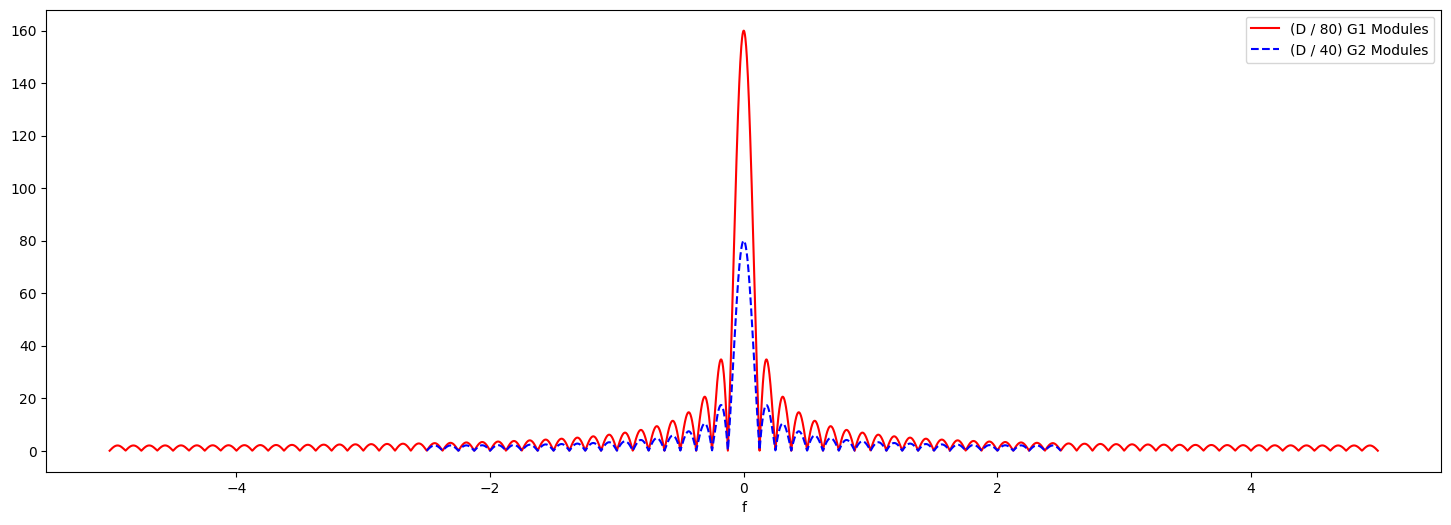

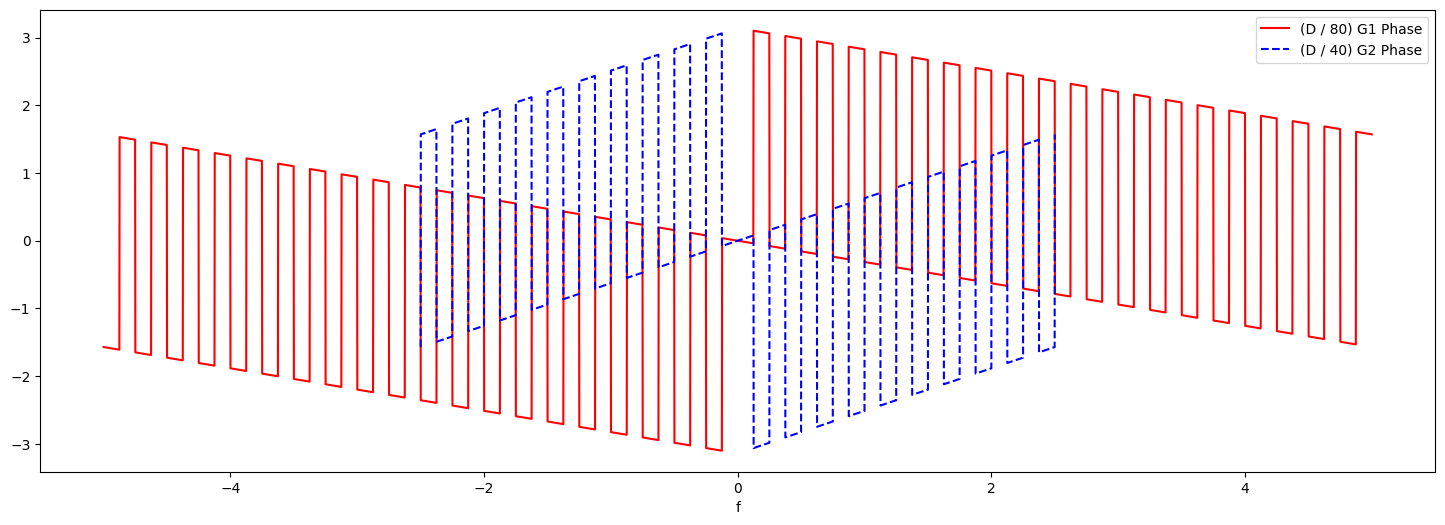

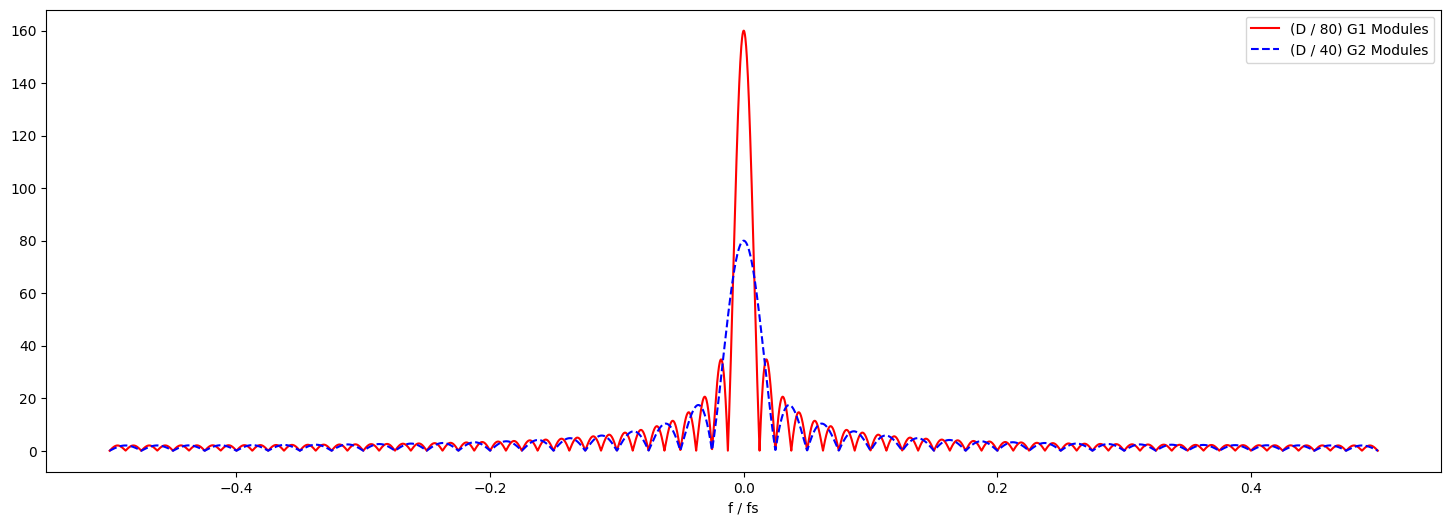

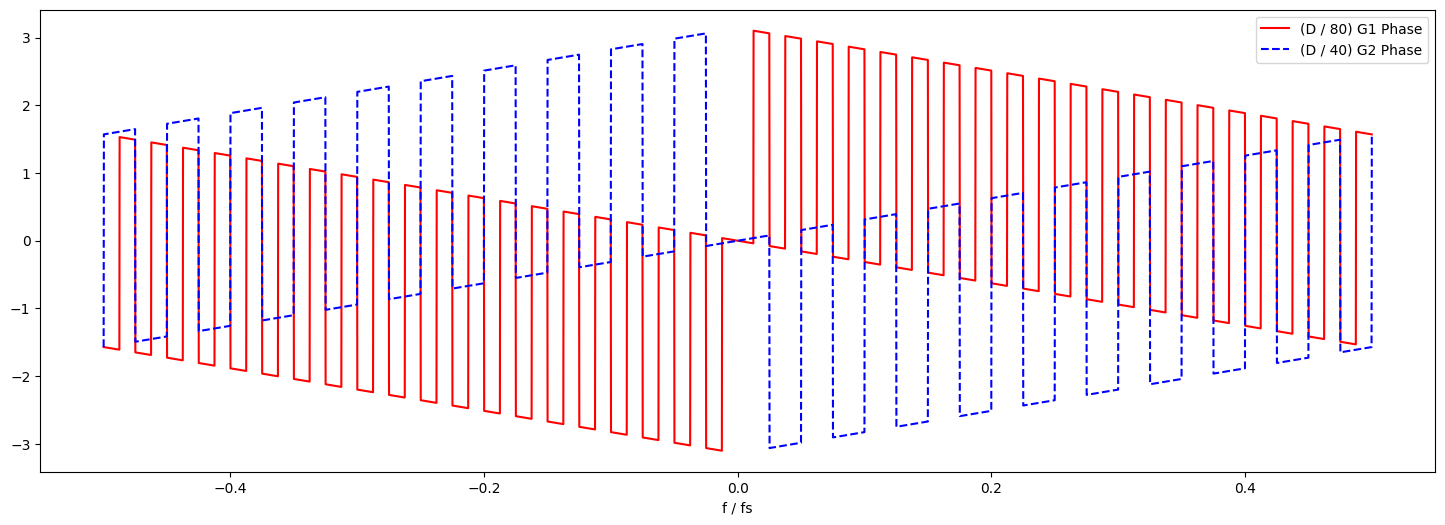

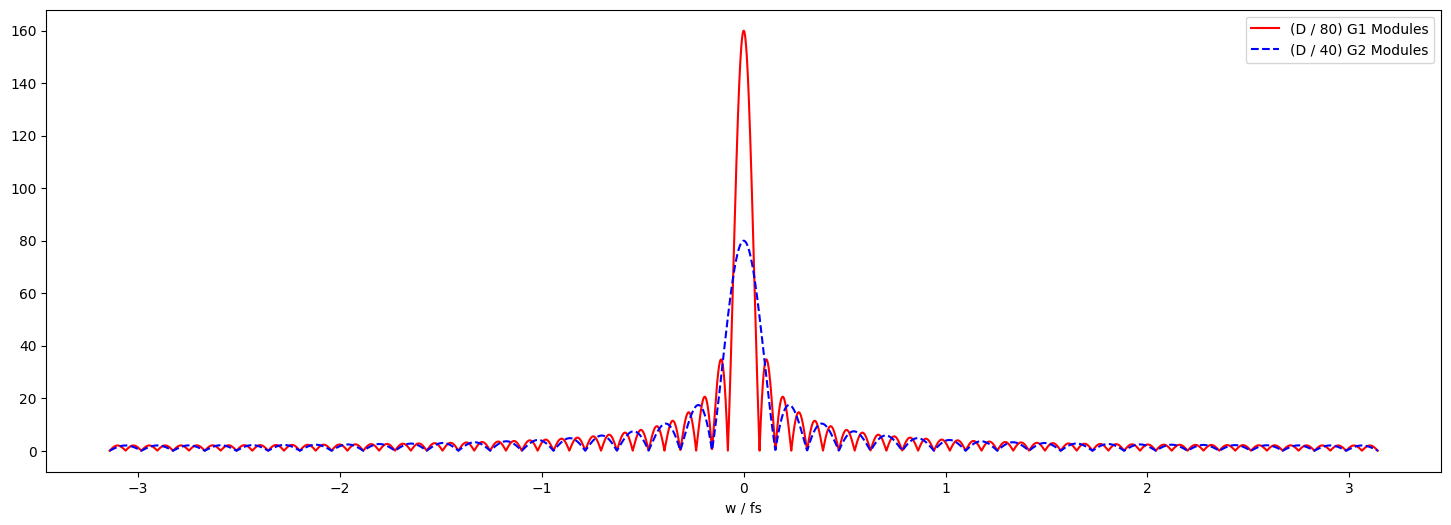

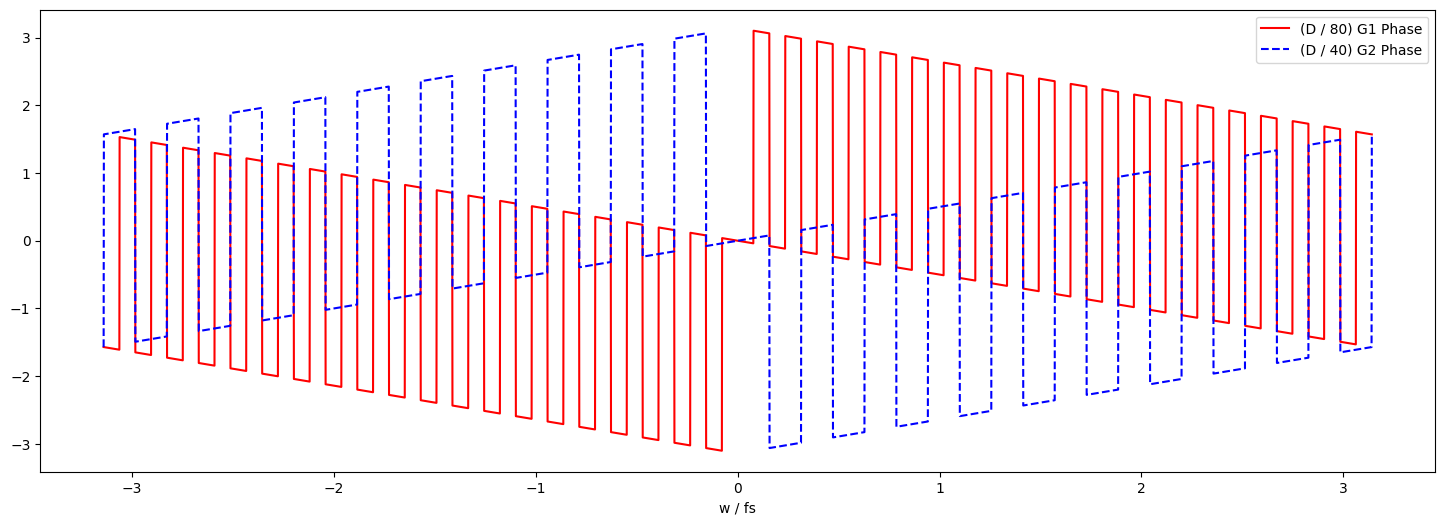

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def gen_g(d, h):
    def g(t):
        return np.where((t >= -d / 2) & (t <= d / 2), h, 0)
    return g

D = 8
H = 2
NUM_W = 5000
CTFT_NUM_T = 5000
g = gen_g(D, H)

def DTFT(nT, xn, w):
    Xw = np.zeros(len(w), dtype=complex)
    for i, wi in enumerate(w):
        # Only at t = nT[i], there is xn[i] * delta
        Xw[i] = np.sum(xn * np.exp(-1j * wi * nT))
    return Xw

def discret_samples(f, s, t, time_interval):
    t_values = np.arange(s, t, time_interval)
    return t_values, f(t_values)

def dtft_of_func_nyquist(f, s, t, time_interval):
    # The period (Nyquist interval) is ws (the sampling frequency)
    # s and t in the time domain
    sampling_angular_frequency = 2 * np.pi / time_interval
    w_vec = np.linspace(-sampling_angular_frequency / 2, +sampling_angular_frequency / 2, NUM_W)
    t_values, f_values = discret_samples(f, s, t, time_interval)
    return w_vec, DTFT(t_values, f_values, w_vec)

def get_mod_pha_real_imag(c):
    return np.abs(c), np.angle(c), c.real, c.imag

prop_desc = ['Modulus', 'Phase']
x_axis_desc = ['f', 'f / fs', 'w / fs']

def compress_x_axis(opt, w_vec, omega_sampling):
    if opt == 0: # [w] -> [f]
        return w_vec / (2 * np.pi)
    f_sampling = omega_sampling / (2 * np.pi)
    if opt == 1: # [f / fs]
        return w_vec / (2 * np.pi) / f_sampling
    if opt == 2: # [w / fs]
        return w_vec / f_sampling

"""
f, f/f2, w/ws
    Modulus, phase
        g1, g2
"""
SAMPLING_T1 = D / 80
SAMPLING_T2 = D / 40
w_vec_d1, dtft_d1 = dtft_of_func_nyquist(g, -D, D, SAMPLING_T1)
w_vec_d2, dtft_d2 = dtft_of_func_nyquist(g, -D, D, SAMPLING_T2)
plots_d1 = get_mod_pha_real_imag(dtft_d1)
plots_d2 = get_mod_pha_real_imag(dtft_d2)
for opt in range(3):
    for part in range(2):
        fig = plt.figure(figsize=(18, 6))
        x_vec1 = compress_x_axis(opt, w_vec_d1, 2 * np.pi / SAMPLING_T1)
        x_vec2 = compress_x_axis(opt, w_vec_d2, 2 * np.pi / SAMPLING_T2)
        plt.plot(x_vec1, plots_d1[part], 'r-', label=f'(D / 80) G1 {prop_desc[part]}')
        plt.plot(x_vec2, plots_d2[part], 'b--', label=f'(D / 40) G2 {prop_desc[part]}')
        plt.xlabel(x_axis_desc[opt])
        plt.legend()
        fig.show()


/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_16408/1668658550.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_16408/1668658550.py:60: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


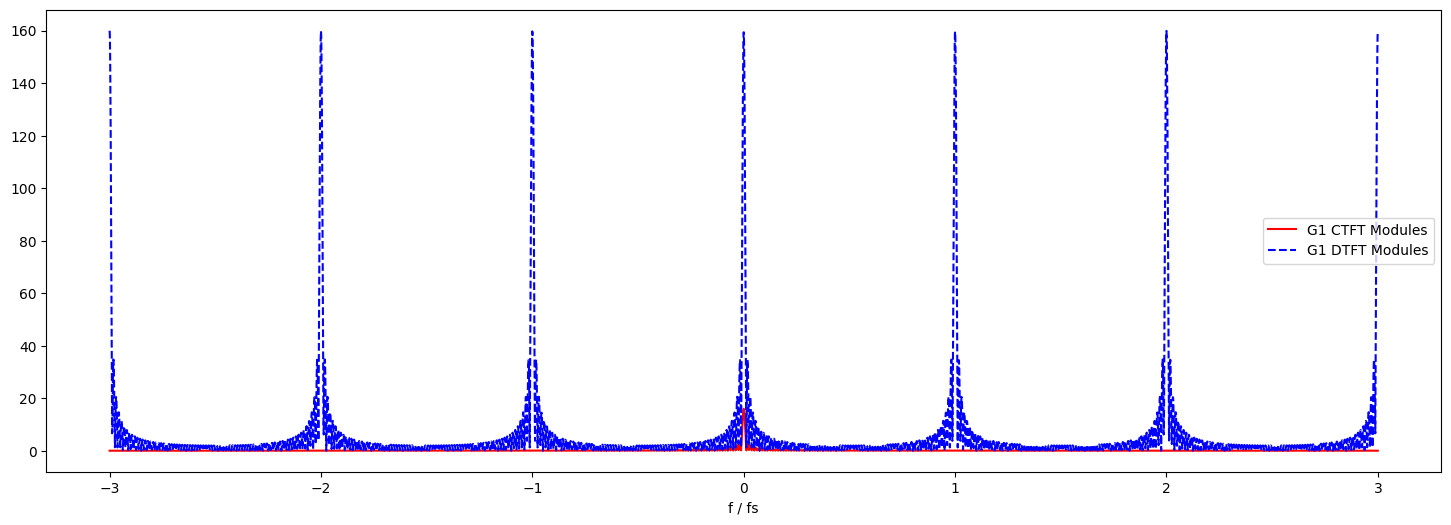

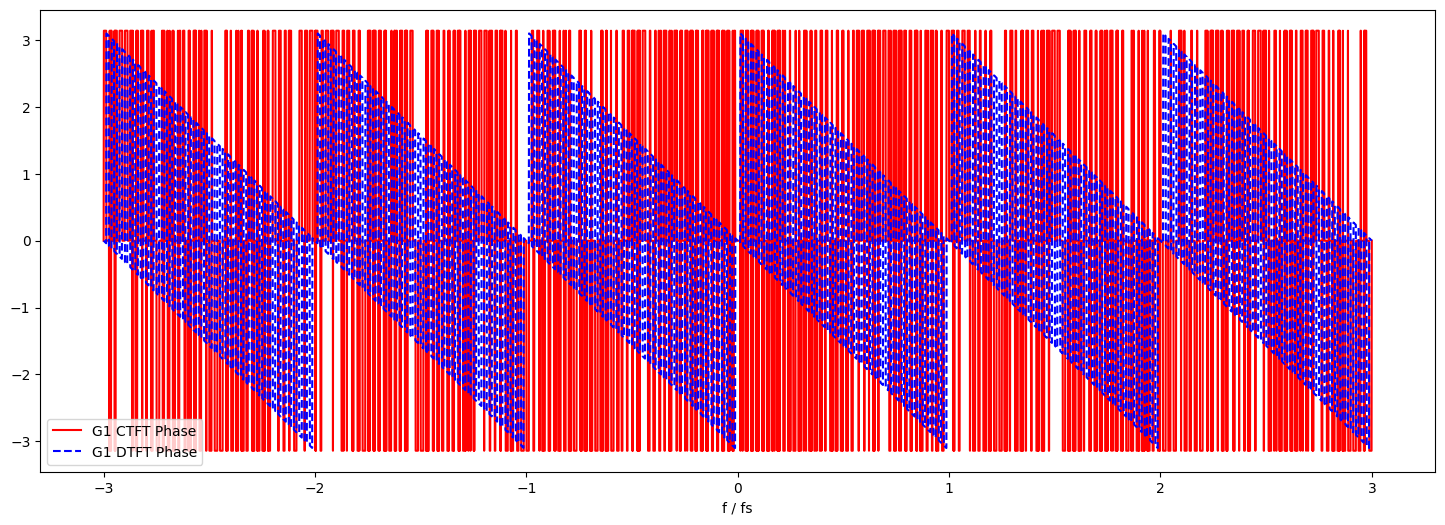

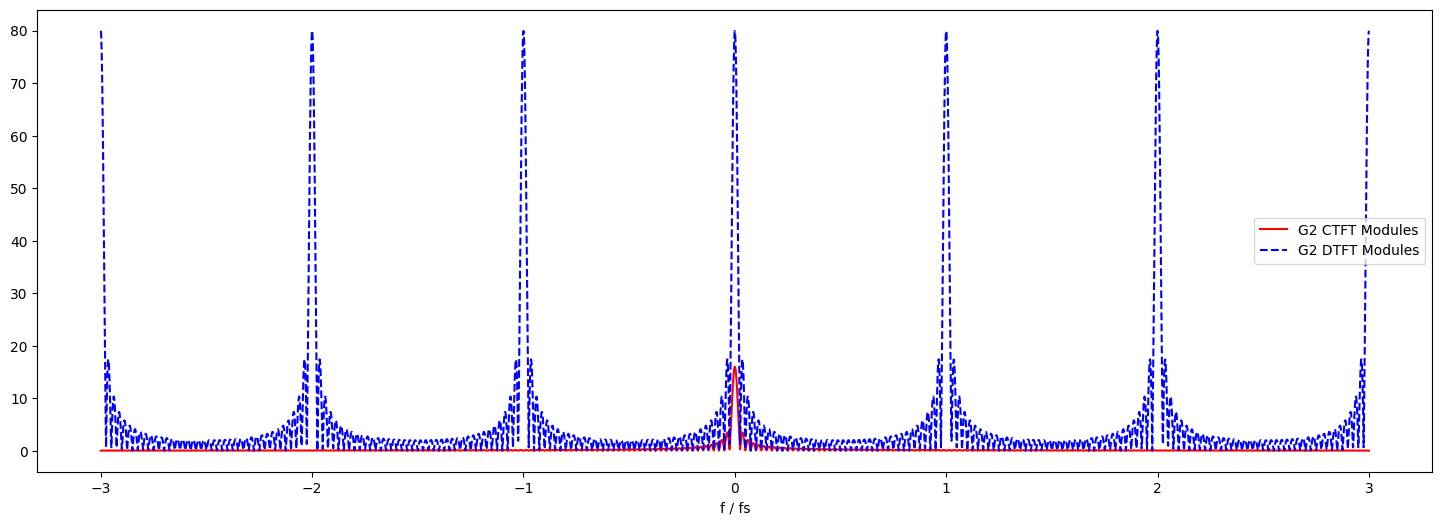

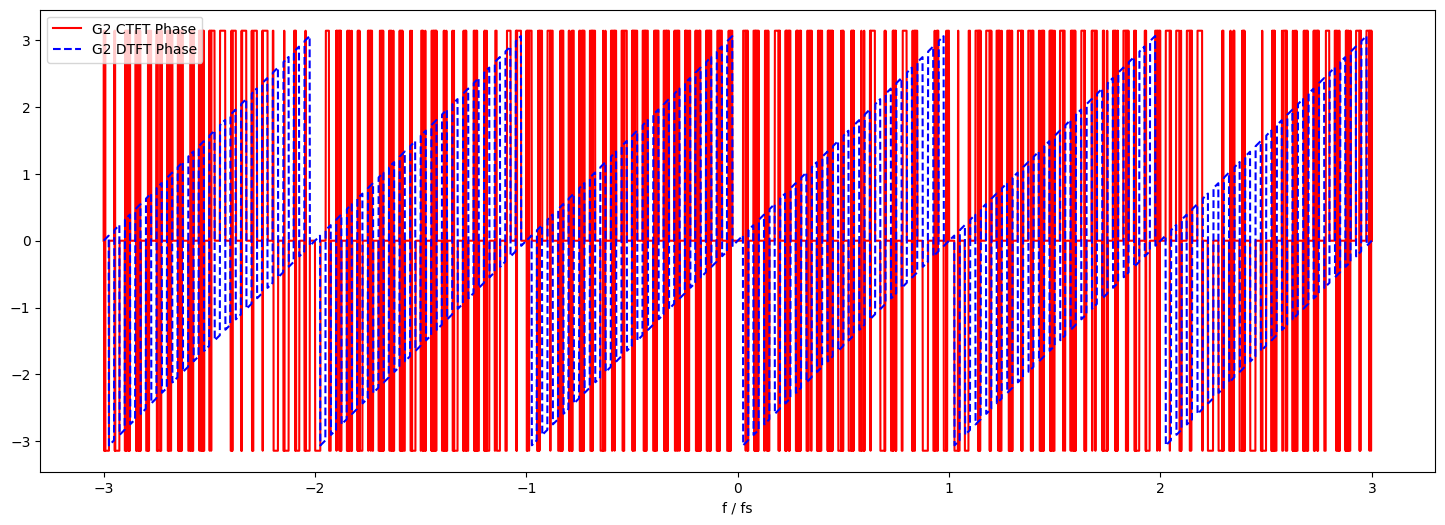

In [37]:
def CTFT(x, t, w):
    """
    x[i] and t[i] is the i-th sample of the signal and time,
    for each w[i], calculate the CTFT of x(t) at w[i]
    """
    Xw = np.zeros_like(w, dtype=complex)
    dt = t[1] - t[0]
    for i, wi in enumerate(w):
        # Two iterators here, x and t
        Xw[i] = np.sum(x * np.exp(-1j * wi * t) * dt)
    return Xw

def ctft_of_func(f, s, t, w_max):
    # The period (Nyquist interval) is ws (the sampling frequency)
    # s and t in the time domain
    w_vec = np.linspace(-w_max, w_max, NUM_W)
    t_values = np.linspace(s, t, CTFT_NUM_T)
    f_values = f(t_values) 
    return w_vec, CTFT(f_values, t_values, w_vec)

def dtft_of_func(f, s, t, time_interval, w_max):
    # The period (Nyquist interval) is ws (the sampling frequency)
    # s and t in the time domain
    w_vec = np.linspace(-w_max, +w_max, NUM_W)
    t_values = np.arange(s, t, time_interval)
    f_values = f(t_values) 
    return w_vec, DTFT(t_values, f_values, w_vec)

w_s1 = 2 * np.pi / SAMPLING_T1
w_s2 = 2 * np.pi / SAMPLING_T2
g1_ctft_w_vec, g1_ctft = ctft_of_func(g, -D, D, 3 * w_s1)
g1_dtft_w_vec, g1_dtft = dtft_of_func(g, -D, D, SAMPLING_T1, 3 * w_s1)
g2_ctft_w_vec, g2_ctft = ctft_of_func(g, -D, D, 3 * w_s2)
g2_dtft_w_vec, g2_dtft = dtft_of_func(g, -D, D, SAMPLING_T2, 3 * w_s2)
g1_ctft_plots = get_mod_pha_real_imag(g1_ctft)
g1_dtft_plots = get_mod_pha_real_imag(g1_dtft)
g2_ctft_plots = get_mod_pha_real_imag(g2_ctft)
g2_dtft_plots = get_mod_pha_real_imag(g2_dtft)

# ct g vs dt g1
for i in range(2):
    fig = plt.figure(figsize=(18, 6))
    x_vec1 = compress_x_axis(1, g1_ctft_w_vec, w_s1)
    x_vec2 = compress_x_axis(1, g1_dtft_w_vec, w_s1)
    plt.plot(x_vec1, g1_ctft_plots[i], 'r-', label=f'G1 CTFT {prop_desc[i]}')
    plt.plot(x_vec2, g1_dtft_plots[i], 'b--', label=f'G1 DTFT {prop_desc[i]}')
    plt.xlabel('f / fs')
    plt.legend()
    fig.show()

# ct g vs dt g2
for i in range(2):
    fig = plt.figure(figsize=(18, 6))
    x_vec1 = compress_x_axis(1, g2_ctft_w_vec, w_s2)
    x_vec2 = compress_x_axis(1, g2_dtft_w_vec, w_s2)
    plt.plot(x_vec1, g2_ctft_plots[i], 'r-', label=f'G2 CTFT {prop_desc[i]}')
    plt.plot(x_vec2, g2_dtft_plots[i], 'b--', label=f'G2 DTFT {prop_desc[i]}')
    plt.xlabel('f / fs')
    plt.legend()
    fig.show()

/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_16408/3329639738.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/f3/wj5xrfy17v99708x3x2cl99m0000gn/T/ipykernel_16408/3329639738.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


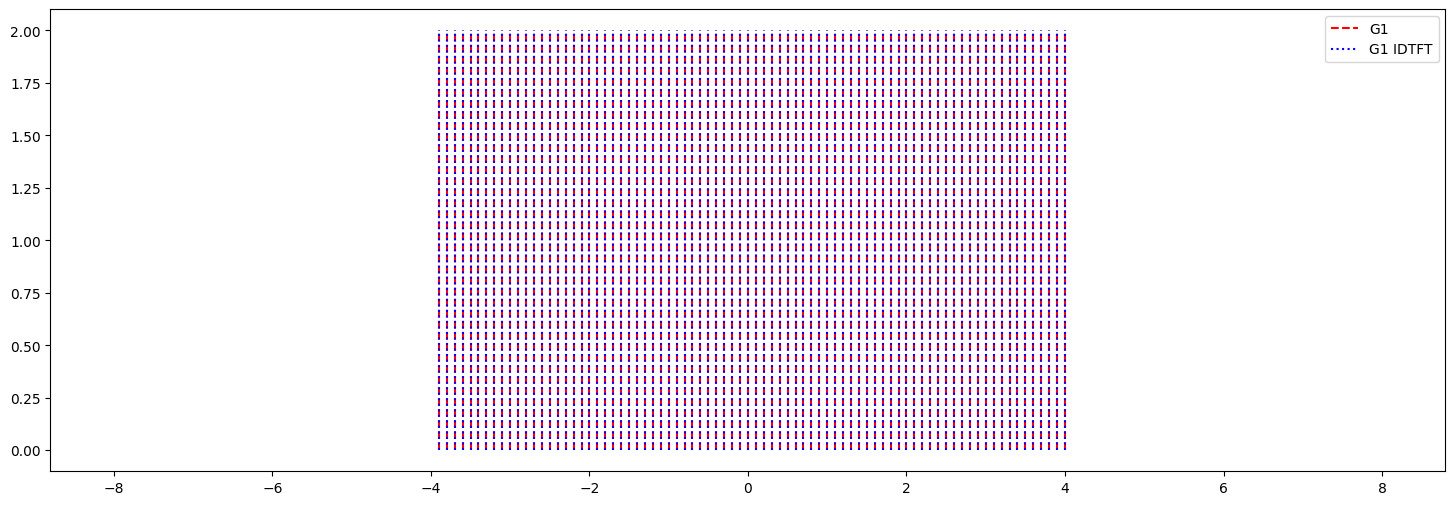

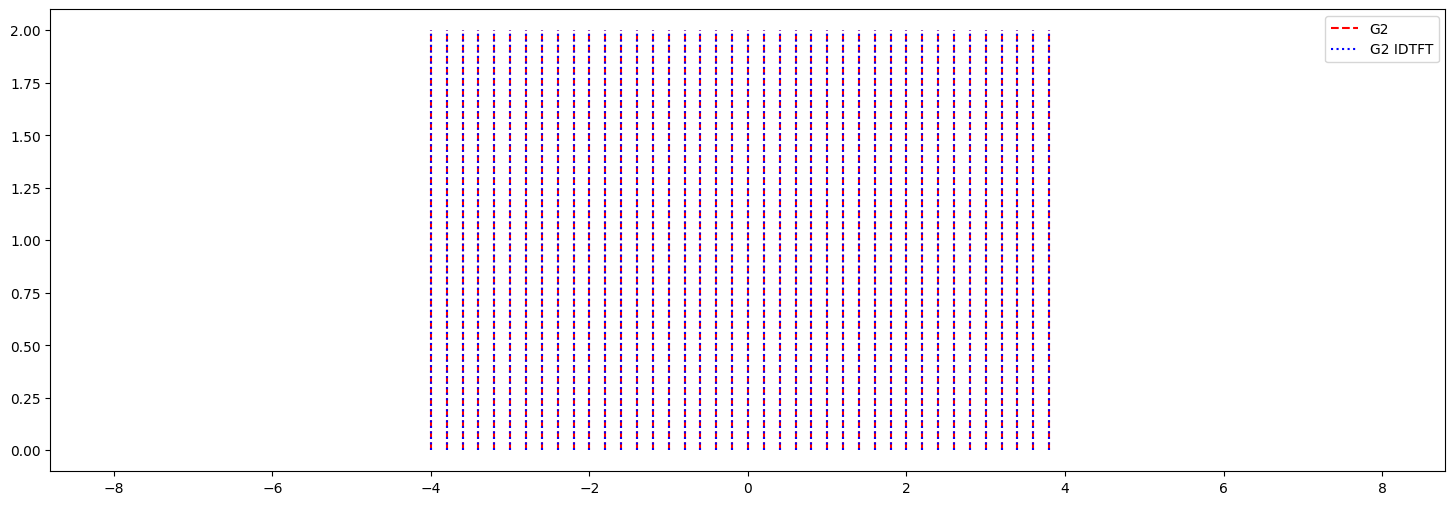

In [48]:
def inverse_dtft(maxn, t_sample, dtft_w_vec, dtft_x_vec):
    # w_vec and x_vec should be in one Nyquist interval, from -ws / 2 to +ws / 2
    ns = np.arange(-maxn, maxn + 1)
    ts = ns * t_sample
    xs = np.zeros_like(ts, dtype=complex)
    dw = dtft_w_vec[1] - dtft_w_vec[0]
    w_sample = 2 * np.pi / t_sample
    for i in range(len(ts)):
        nT = ts[i]
        xs[i] = sum(dtft_x_vec * np.exp(1j * nT * dtft_w_vec) * dw) / w_sample 
    return ts, xs

g1_t, g1_values = discret_samples(g, -D, D, SAMPLING_T1)
g1_dtft_w_vec, g1_dtft = dtft_of_func(g, -D, D, SAMPLING_T1, w_s1/ 2)
g1_idtft_t, g1_idtft = inverse_dtft(80, SAMPLING_T1, g1_dtft_w_vec, g1_dtft)
g1_idtft_plots = get_mod_pha_real_imag(g1_idtft) # complex

fig = plt.figure(figsize=(18, 6))
plt.vlines(g1_t, ymin = 0, ymax=g1_values, colors='r', linestyles='dashed', label='G1')
plt.vlines(g1_idtft_t, ymin = 0, ymax=g1_idtft_plots[0], colors='b', linestyles='dotted', label='G1 IDTFT')
plt.legend()
fig.show()

g2_t, g2_values = discret_samples(g, -D, D, SAMPLING_T2)
g2_dtft_w_vec, g2_dtft = dtft_of_func(g, -D, D, SAMPLING_T2, w_s2 / 2)
g2_idtft_t, g2_idtft = inverse_dtft(40, SAMPLING_T2, g2_dtft_w_vec, g2_dtft)
g2_idtft_plots = get_mod_pha_real_imag(g2_idtft) # complex

fig = plt.figure(figsize=(18, 6))
plt.vlines(g2_t, ymin = 0, ymax=g2_values, colors='r', linestyles='dashed', label='G2')
plt.vlines(g2_idtft_t, ymin = 0, ymax=g2_idtft_plots[0], colors='b', linestyles='dotted', label='G2 IDTFT')
plt.legend()
fig.show()

In [59]:
def calculate_energy(ys, xs):
    dx = xs[1] - xs[0]
    return sum(ys * ys.conjugate() * dx)

t_values, g_values = discret_samples(g, -D, D, SAMPLING_T1)
g_energy =  calculate_energy(g_values, t_values)
w_values, dtft_of_g = dtft_of_func(g, -D, D, SAMPLING_T1, w_s1 / 2)
g1_dtft_energy = calculate_energy(dtft_of_g, w_values) / 2 / np.pi
print(g_energy, g1_dtft_energy)

31.999999999999886 (3199.9999999995825+0j)
